# Conv2D

In [3]:
import torch
import torch.nn as nn

# Define the model using nn.Sequential
model = nn.Sequential(
    # Conv2D layer with 3 input channels (e.g., RGB image), 6 output channels, 3x3 kernel
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, 
              padding=1, stride=1, dilation=1),
    nn.ReLU(),
    
    # Dropout layer (e.g., 25% drop rate)
    nn.Dropout(p=0.25),
    
    # Max Pooling layer with 2x2 kernel and stride of 2
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    # Another Conv2D layer (6 input channels, 12 output channels, 3x3 kernel)
    nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, 
              padding=1, stride=1, dilation=1),
    nn.ReLU(),
    
    # Dropout layer (e.g., 25% drop rate)
    nn.Dropout(p=0.25),
    
    # Max Pooling layer with 2x2 kernel and stride of 2
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    # Flatten the output to feed into a fully connected layer
    nn.Flatten(),
    
    # Fully connected layer (simple output layer with 10 output classes, for example)
    nn.Linear(12 * 8 * 8, 10)  # Adjust input size based on input size and Conv2D output
)

# Example of model summary
print(model)


Sequential(
  (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Dropout(p=0.25, inplace=False)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): Dropout(p=0.25, inplace=False)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=768, out_features=10, bias=True)
)


In [6]:
import torch

# Assuming the model is already defined as in the previous example

# Create a random input tensor simulating a batch of 4 RGB images of size 32x32
input_tensor = torch.randn(4, 3, 32, 32)  # Shape: (batch_size, channels, height, width)

# Print the shape of the input tensor
print(f'Input shape: {input_tensor.shape}')

# Pass the input through the model
output_tensor = model(input_tensor)

# Print the shape of the output tensor
print(f'Output shape: {output_tensor.shape}')


Input shape: torch.Size([4, 3, 32, 32])
Output shape: torch.Size([4, 10])


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)  # Input channels: 1 (grayscale)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # Adjust input size for the linear layer
        self.fc2 = nn.Linear(128, 10)  # 10 output classes for digits 0-9

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)  # Flatten the output
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleCNN()

# 3. Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the model
num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        running_loss += loss.item() * images.size(0)  # Accumulate loss

    epoch_loss = running_loss / len(train_loader.dataset)  # Average loss for the epoch
    train_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# 5. Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get predicted classes
        total += labels.size(0)  # Total number of labels
        correct += (predicted == labels).sum().item()  # Count correct predictions

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training loss over epochs
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


Epoch [1/5], Loss: 0.2802
Epoch [2/5], Loss: 0.0886
Epoch [3/5], Loss: 0.0652
Epoch [4/5], Loss: 0.0525


### Using nn.sequential and GPU:

Using device: cuda
Epoch [1/5], Loss: 0.2892
Epoch [2/5], Loss: 0.1120
Epoch [3/5], Loss: 0.0872
Epoch [4/5], Loss: 0.0768
Epoch [5/5], Loss: 0.0679
Test Accuracy: 0.9909


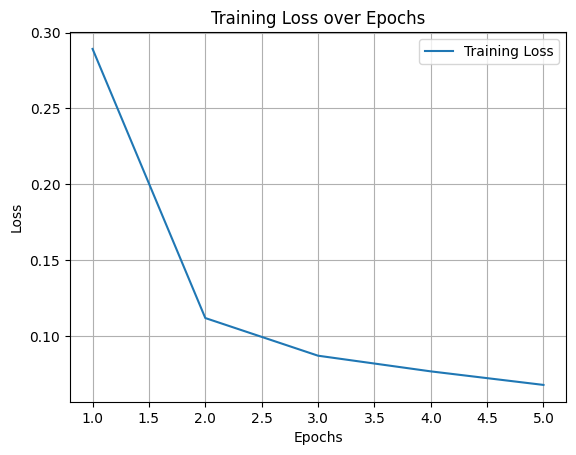

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# 1. Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define the CNN model using nn.Sequential
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=5, padding=2),  # Input channels: 1 (grayscale)
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Conv2d(16, 32, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Dropout(p=0.5),
    
    nn.Flatten(),  # Flatten the output for the fully connected layer
    nn.Linear(32 * 7 * 7, 128),  # Adjust input size for the linear layer
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(128, 10)  # Output layer with 10 classes
)

# Move the model to GPU if available
model = model.to(device)

# 3. Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the model
num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        # Move data to the same device as the model (GPU or CPU)
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        running_loss += loss.item() * images.size(0)  # Accumulate loss

    epoch_loss = running_loss / len(train_loader.dataset)  # Average loss for the epoch
    train_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# 5. Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        # Move data to the same device as the model (GPU or CPU)
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get predicted classes
        total += labels.size(0)  # Total number of labels
        correct += (predicted == labels).sum().item()  # Count correct predictions

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training loss over epochs
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
